# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

In [3]:
train_path = "/kaggle/input/brain-tumor-classification-mri/Training"
test_path = "/kaggle/input/brain-tumor-classification-mri/Testing"

gl_tr = "/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor"
men_tr = "/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor"
no_tr = "/kaggle/input/brain-tumor-classification-mri/Training/no_tumor"
pit_tr = "/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor"


gl_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor"
men_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor"
no_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor"
pit_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor"

gl_tr = os.listdir(gl_tr)
men_tr = os.listdir(men_tr)
no_tr = os.listdir(no_tr)
pit_tr = os.listdir(pit_tr)

gl_ts = os.listdir(gl_ts)
men_ts = os.listdir(men_ts)
no_ts = os.listdir(no_ts)
pit_ts = os.listdir(pit_ts)

In [4]:
print(len(gl_tr))
print(len(men_tr))
print(len(no_tr))
print(len(pit_tr))

826
822
395
827


In [5]:
print(len(gl_ts))
print(len(men_ts))
print(len(no_ts))
print(len(pit_ts))

100
115
105
74


In [6]:
gl_tr_label = [0]*len(gl_tr)
men_tr_label = [1]*len(men_tr)
no_tr_label = [2]*len(no_tr)
pit_tr_label = [3]*len(pit_tr)

gl_ts_label = [0]*len(gl_ts)
men_ts_label = [1]*len(men_ts)
no_ts_label = [2]*len(no_ts)
pit_ts_label = [3]*len(pit_ts)

In [7]:
train_label = gl_tr_label + men_tr_label + no_tr_label + pit_tr_label
test_label = gl_ts_label + men_ts_label + no_ts_label + pit_ts_label

In [8]:
print(len(train_label))
print(len(test_label))

2870
394


In [9]:
train_label[:4]

[0, 0, 0, 0]

In [10]:
test_label[-5:]

[3, 3, 3, 3, 3]

In [11]:
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [12]:
label = train_label + test_label
len(label)

3264

In [13]:
y = np.array(label)

In [14]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
# gl_tr = "/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor"
# men_tr = "/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor"
# no_tr = "/kaggle/input/brain-tumor-classification-mri/Training/no_tumor"
# pit_tr = "/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor"


# gl_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor"
# men_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor"
# no_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor"
# pit_ts = "/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor"

data = []

## For Training Data
for img_file in gl_tr:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_tr:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_tr:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_tr:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
    
## For Testing Data
    
for img_file in gl_ts:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_ts:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_ts:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_ts:
    image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)

In [16]:
x = np.array(data)

In [17]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [18]:
print(x.shape)
print(y.shape)

(3264, 224, 224, 3)
(3264,)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2937, 224, 224, 3)
(327, 224, 224, 3)
(2937,)
(327,)


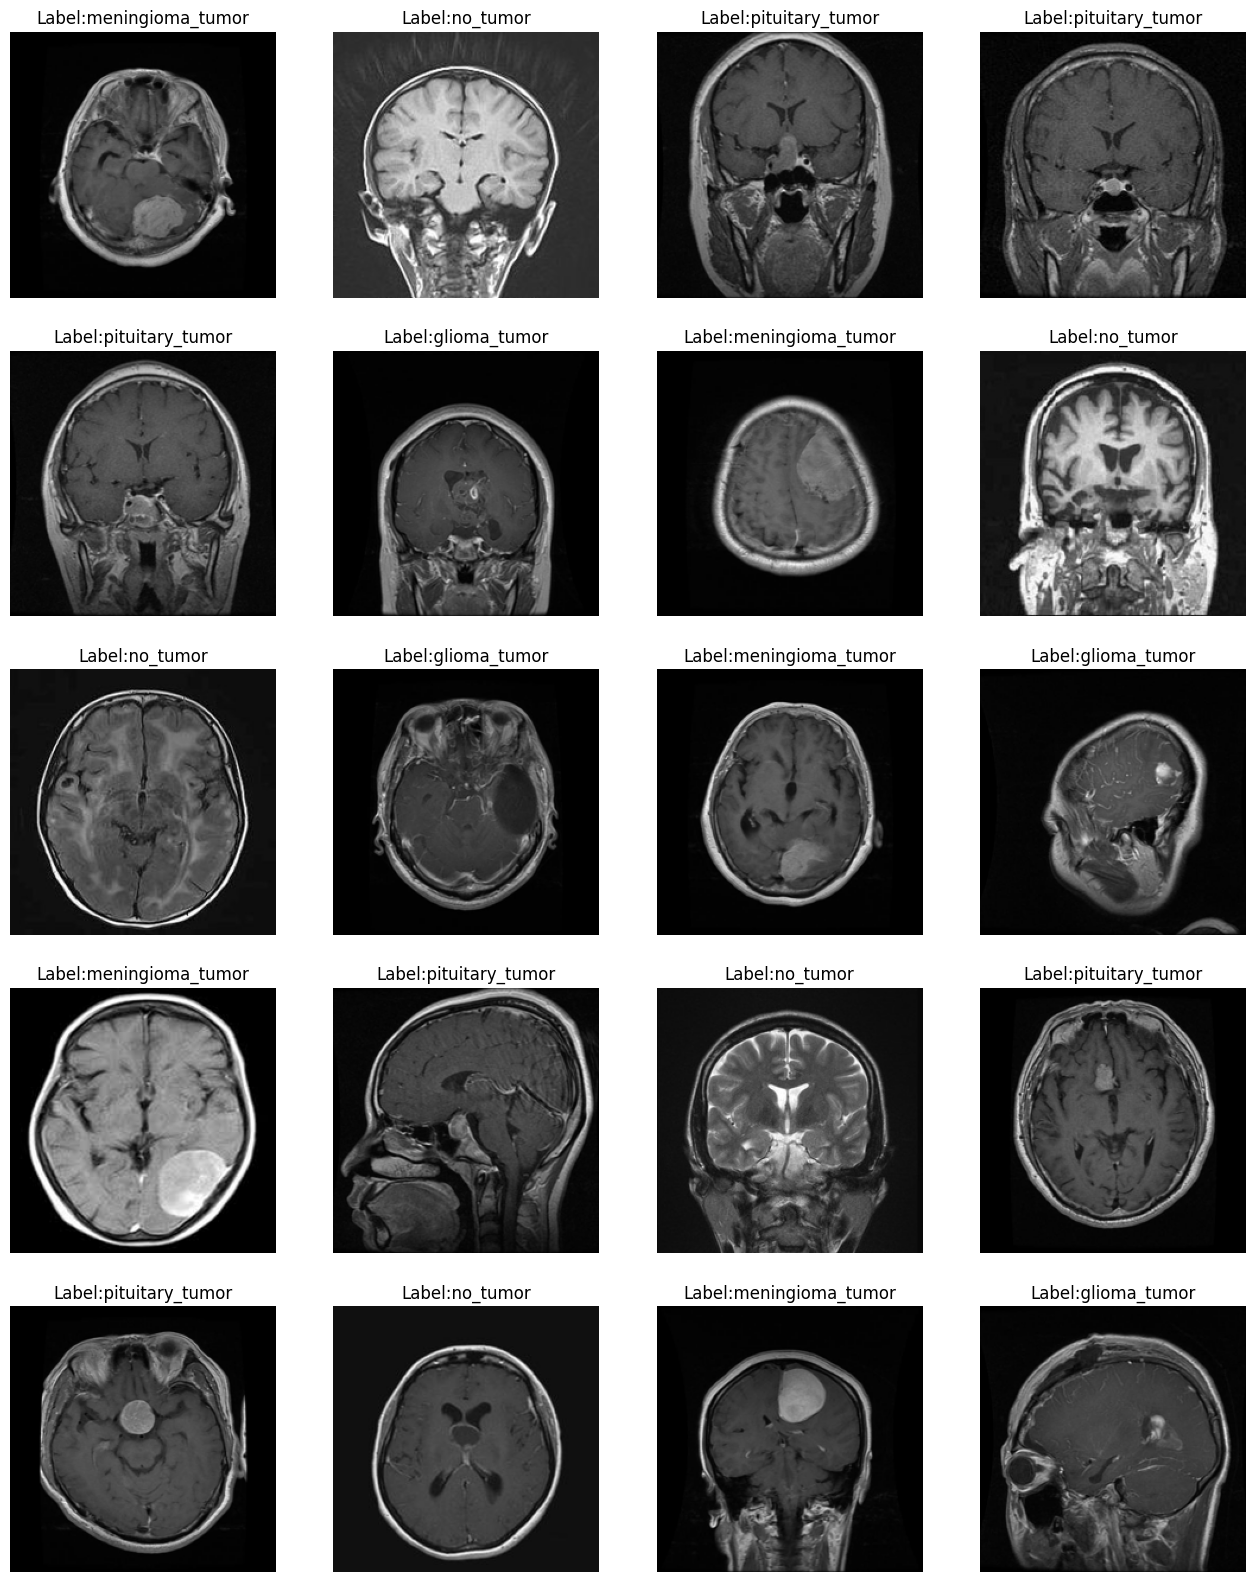

In [20]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [21]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [32]:
# MobileNet V2 Classification 100%  224x224
path1 ="/kaggle/input/mobilenet"

path="/kaggle/input/mobilenet1"
pretrained_model = hub.KerasLayer(path1, input_shape=(224,224,3), trainable=False)

In [26]:
num_class = 4
pre_model = Sequential()
pre_model.add(pretrained_model)
pre_model.add(Dense(units=num_class,activation="softmax"))

pre_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 4)                 4008      
                                                                 
Total params: 3,544,273
Trainable params: 4,008
Non-trainable params: 3,540,265
_________________________________________________________________


In [33]:
pre_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_1 = pre_model.fit(x_train_scaled, y_train ,
          batch_size=32, epochs=15, validation_data = (x_test_scaled,y_test))

Epoch 1/15
92/92 [==============================] - 60s 636ms/step - loss: 0.2265 - accuracy: 0.9200 - val_loss: 0.3558 - val_accuracy: 0.8685
Epoch 2/15
92/92 [==============================] - 57s 625ms/step - loss: 0.2059 - accuracy: 0.9305 - val_loss: 0.3535 - val_accuracy: 0.8807
Epoch 3/15
92/92 [==============================] - 58s 631ms/step - loss: 0.1945 - accuracy: 0.9360 - val_loss: 0.3758 - val_accuracy: 0.8716
Epoch 4/15
92/92 [==============================] - 58s 635ms/step - loss: 0.1933 - accuracy: 0.9363 - val_loss: 0.3642 - val_accuracy: 0.8777
Epoch 5/15
92/92 [==============================] - 59s 639ms/step - loss: 0.1784 - accuracy: 0.9414 - val_loss: 0.3418 - val_accuracy: 0.8777
Epoch 6/15
92/92 [==============================] - 59s 642ms/step - loss: 0.1777 - accuracy: 0.9435 - val_loss: 0.3471 - val_accuracy: 0.8746
Epoch 7/15
92/92 [==============================] - 59s 643ms/step - loss: 0.1739 - accuracy: 0.9442 - val_loss: 0.3570 - val_accuracy: 0.8777

In [34]:
loss, acc = pre_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = pre_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 64s 701ms/step - loss: 0.1242 - accuracy: 0.9660
Loss on Train Data: 0.12421193718910217
Accuracy on Train Data: 0.965951681137085

11/11 [==============================] - 6s 571ms/step - loss: 0.3342 - accuracy: 0.8838
Loss on Test Data: 0.33421069383621216
Accuracy on Test Data: 0.8837920427322388


In [36]:
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]

loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]

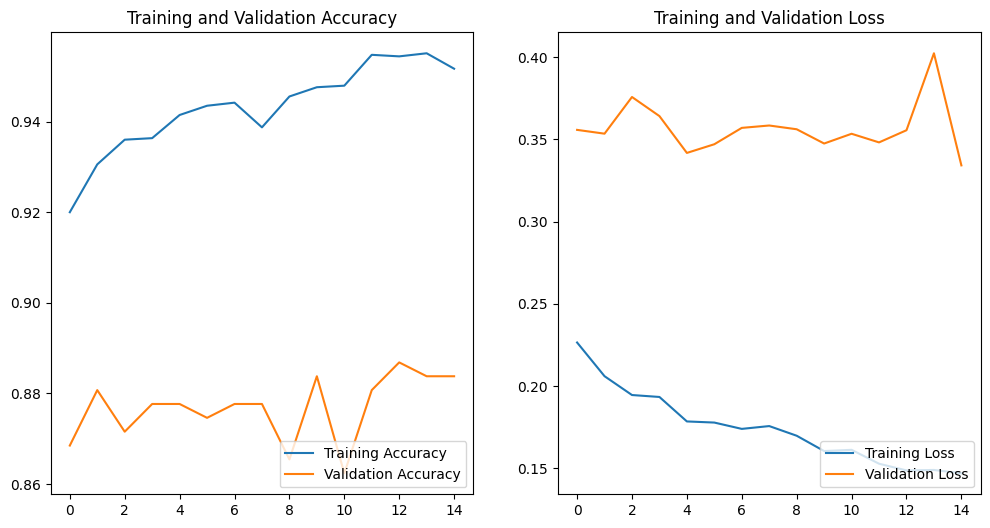

In [37]:
EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [38]:
y_pred = pre_model.predict(x_test_scaled)

11/11 [==============================] - 7s 555ms/step


In [39]:
y_pred_test_label = [np.argmax(i) for i in y_pred]

In [40]:
y_pred_test_label[:10]  ## Predicted Images

[2, 0, 3, 0, 3, 0, 1, 0, 3, 0]

In [41]:
y_test[:10]  ## Actual Images

array([2, 0, 3, 1, 3, 0, 0, 0, 2, 0])

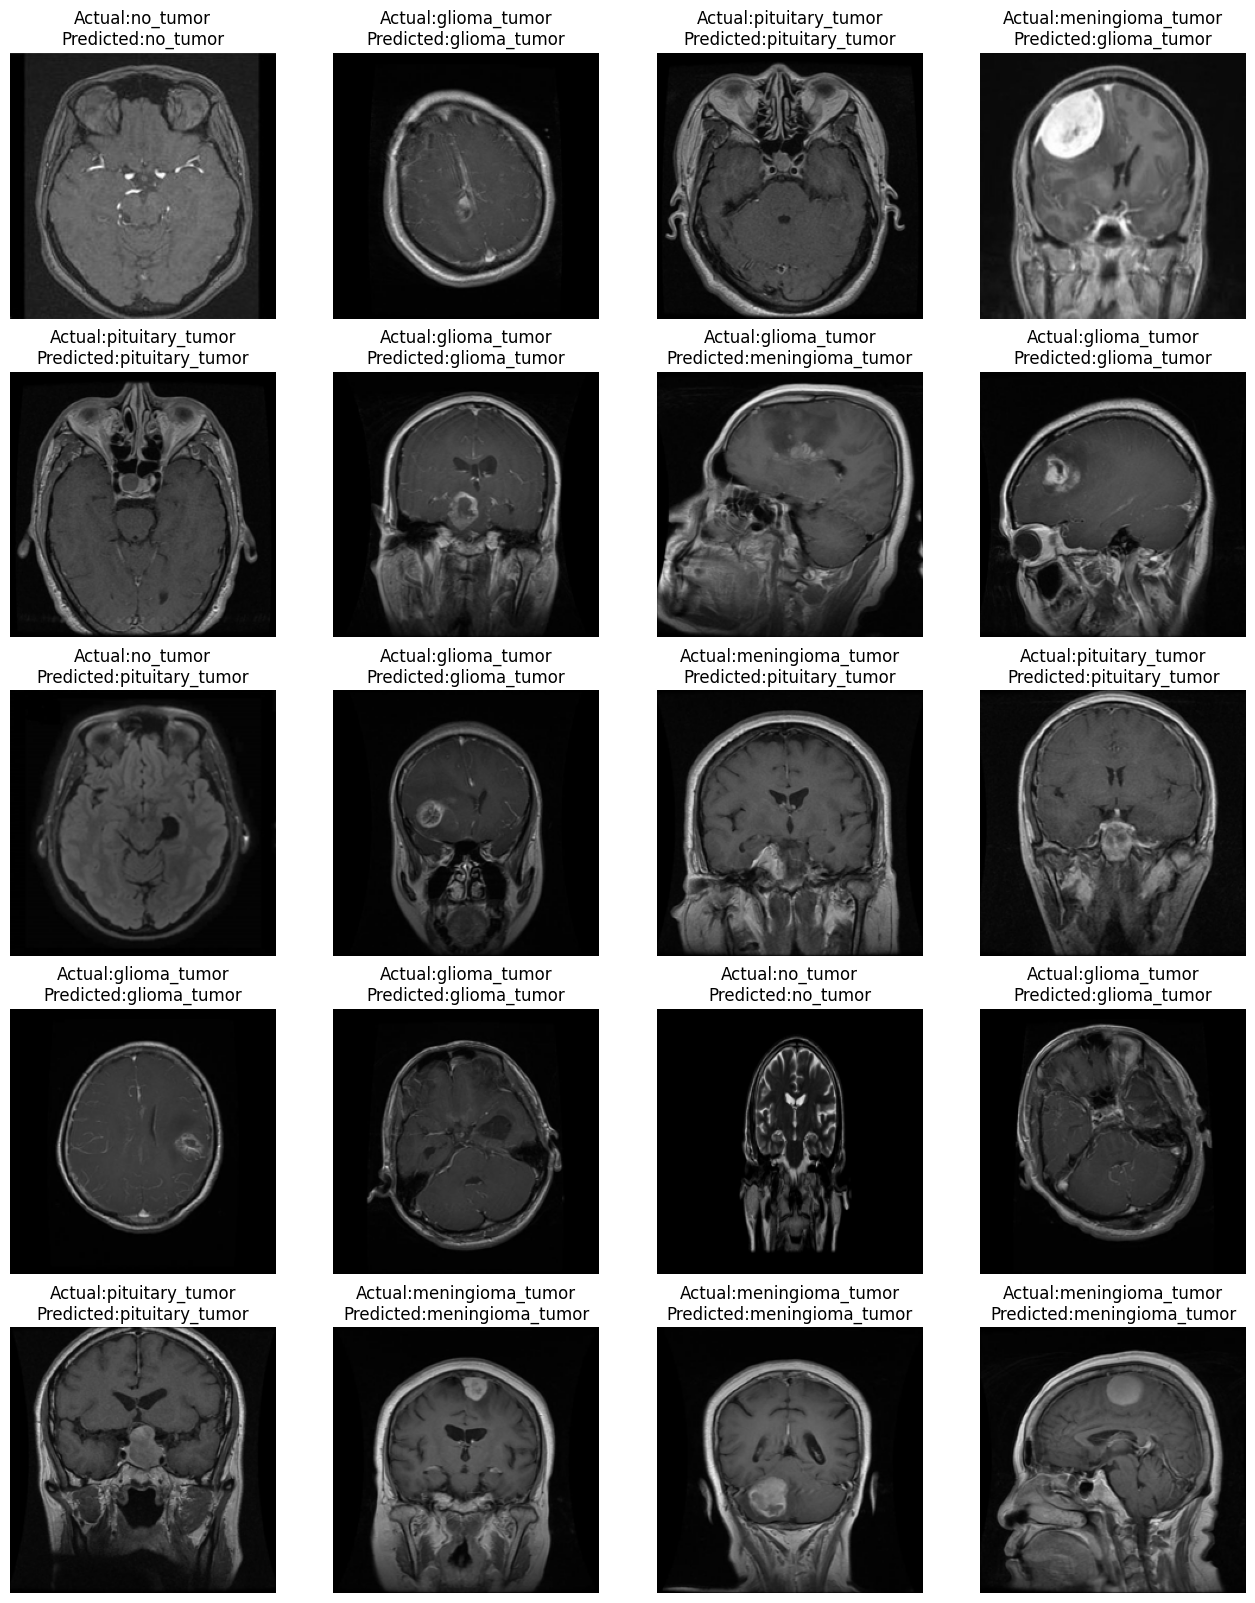

In [42]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")
